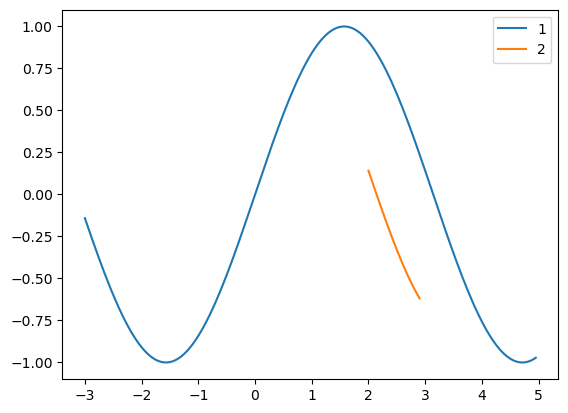

dx = 0.9787329912766376
mse = 5.860130879375553e-05


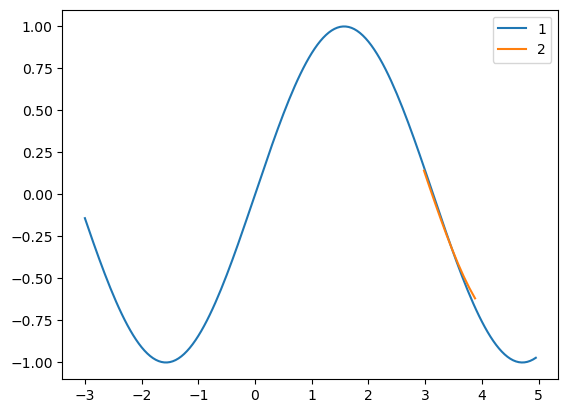

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from util import find_dx

# Test
x1 = np.arange(-3, 5, 0.05)
y1 = np.sin(x1)
x2 = np.arange(2, 3, 0.1)
y2 = np.sin(x2 + 1.2) + 0.2

plt.plot(x1, y1, label='1')
plt.plot(x2, y2, label='2')
plt.legend()
plt.show()

dx, mse = find_dx(x1, y1, x2, y2, (-5, 5))
print('dx =', dx)
print('mse =', mse)
x2 += dx
plt.plot(x1, y1, label='1')
plt.plot(x2, y2, label='2')
plt.legend()
plt.show()

# Find CURVEPOPS1 Match

C:/Users/mikel/Desktop/Supernovae/CURVEPOPS/CURVEPOPS1-release-31-10-18/SNEC-models\DE-input-z014-30-0.9-1.2\data/magnitudes.dat
mse:  0.3633612324016852
dt:  9.9999947848782


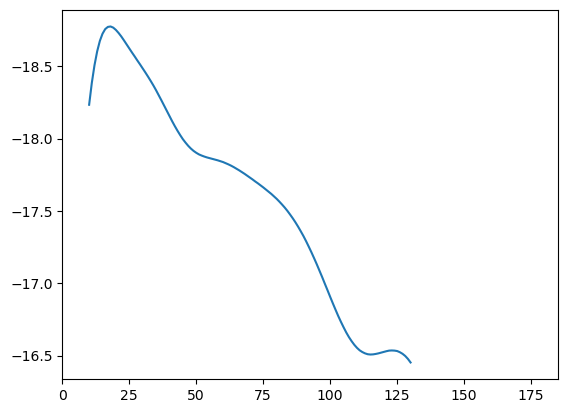

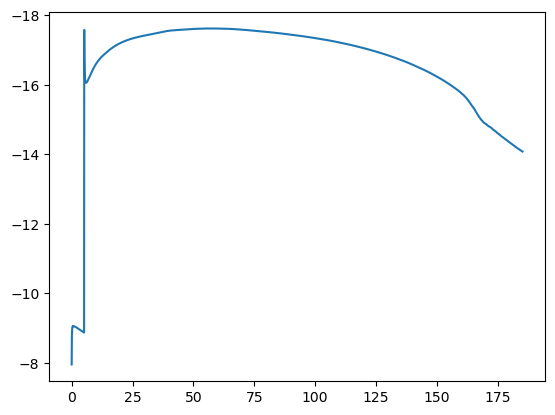

In [ ]:
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd
import numpy as np
import warnings
import os
from util import find_dx
from astropy.visualization import quantity_support
quantity_support()

# Get observed
compare_path = 'C:/Users/mikel/Desktop/Supernovae/CURVEPOPS/2020hgw.dat_0.txt'
data = pd.read_csv(compare_path, sep=' ')
t_obs = data['Time (MJD)']
t_obs -= np.min(t_obs)
m_obs = data['PAN-STARRS/PS1.r']

# CURVEPOPS Comparison
directory_path = 'C:/Users/mikel/Desktop/Supernovae/CURVEPOPS/CURVEPOPS1-release-31-10-18/SNEC-models'
entries = os.listdir(directory_path)

min_mse = None
min_t = None
min_m = None
min_path = None
min_dt = None

for entry in entries:
    full_path = os.path.join(directory_path, entry, 'data/magnitudes.dat')
    if os.path.isfile(full_path):
        column_names = ['time (s)', 'temp (K)', 'PTF_R_AB', 'u', 'g', 'r', 'i', 'z', 'U', 'B', 'V', 'R', 'I']
        df = pd.read_csv(full_path, sep=' ', skipinitialspace=True, header=None, names=column_names)
        t_mod = df['time (s)'] / 86400
        m_mod = df['r']
        if np.count_nonzero(~np.isnan(m_mod)) > 20:
            warnings.simplefilter("ignore", category=RuntimeWarning)
            dt, mse = find_dx(t_mod, m_mod, t_obs, m_obs, (0, 10))

            if min_mse == None or mse < min_mse:
                min_mse = mse
                min_t = t_mod
                min_m = m_mod
                min_dt = dt
                min_path = full_path

print(min_path)
print('mse:', min_mse)
print('dt:', min_dt)

fig, ax = plt.subplots()
ax.invert_yaxis()
t_obs += min_dt
plt.plot(t_obs, m_obs)
plt.xlim(np.min(min_t), np.max(min_t))
plt.show()

fig, ax = plt.subplots()
ax.invert_yaxis()
plt.plot(min_t, min_m)
plt.show()

# View Data

C:/Users/mikel/Desktop/Supernovae/CURVEPOPS/CURVEPOPS1-release-31-10-18/SNEC-models\DE-input-z014-15-0.1-0\data/magnitudes.dat


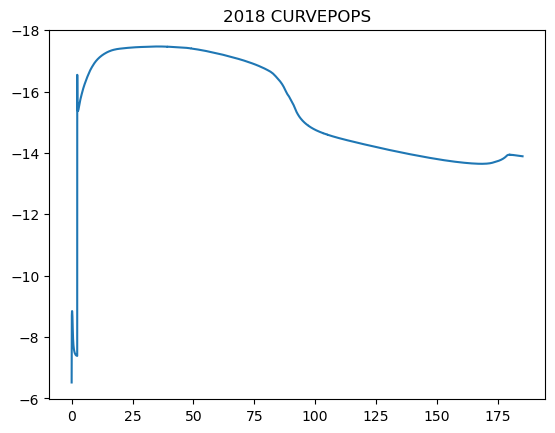

In [ ]:
import pandas as pd
import os

# Random 2018 data
directory_path = 'C:/Users/mikel/Desktop/Supernovae/CURVEPOPS/CURVEPOPS1-release-31-10-18/SNEC-models'
entries = os.listdir(directory_path)
entry = entries[np.random.randint(0, len(entries) - 1)]
full_path = os.path.join(directory_path, entry, 'data/magnitudes.dat')
column_names = ['time (s)', 'temp (K)', 'PTF_R_AB', 'u', 'g', 'r', 'i', 'z', 'U', 'B', 'V', 'R', 'I']
df = pd.read_csv(full_path, sep=' ', skipinitialspace=True, header=None, names=column_names)
t = df['time (s)'] / 86400
mag = df['r']

print(full_path)
fig, ax = plt.subplots()
ax.invert_yaxis()
plt.title('2018 CURVEPOPS')
plt.plot(t, mag)
plt.show()

C:/Users/mikel/Desktop/Supernovae/CURVEPOPS/CURVEPOPS2-14-7-2025/snec-data\Data-csm2-z014-21-49.75--2-low\data/magnitudes.dat


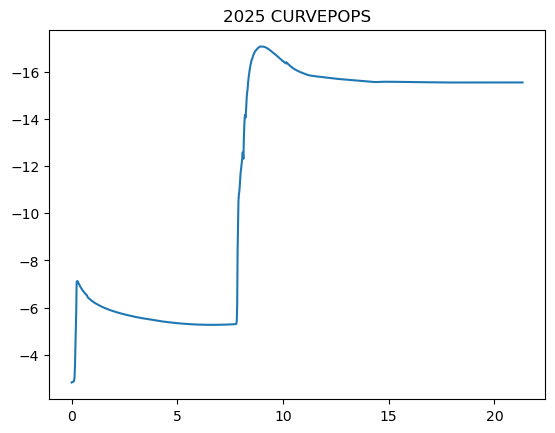

In [7]:
import pandas as pd
import os

# Random 2025 data
directory_path = 'C:/Users/mikel/Desktop/Supernovae/CURVEPOPS/CURVEPOPS2-14-7-2025/snec-data'
entries = os.listdir(directory_path)
entry = entries[np.random.randint(0, len(entries) - 1)]
full_path = os.path.join(directory_path, entry, 'data/magnitudes.dat')
column_names = ['time (s)', 'temp (K)', 'PTF_R_AB', 'u', 'g', 'r', 'i', 'z', 'U', 'B', 'V', 'R', 'I']
df = pd.read_csv(full_path, sep=' ', skipinitialspace=True, header=None, names=column_names)
t = df['time (s)'] / 86400
mag = df['r']

print(full_path)
fig, ax = plt.subplots()
ax.invert_yaxis()
plt.title('2025 CURVEPOPS')
plt.plot(t, mag)
plt.show()